# Project Iris

## Description of movement assessment dataset

SepalLengthCm: have the length of the sepal in centimeter

SepalWidthCm: have the width of the sepal in centimeter

PetalLengthCm: have the length of the Petal in centimeter

PetalWidthCm: have the width of the Petal in centimeter

Species: have three classes of species Versicolor, Setosa and Virginicia.


### Import Libraries

In [1]:
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.metrics import accuracy_score
import time

### Configuration

In [2]:
test_size=0.2 
random_state=42
cv=5

### Use full function

In [3]:
def load_data():
    return pd.read_csv("iris.csv")

### Read tha data

In [4]:
iris = load_data()
iris.drop('Id',inplace=True, axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we need to convert ‘Species’ feature into numeric

### 1.Check Data

#### 1.1 Lets have a look at the data and see identify Object/Categorical values and Continuous values

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


as we see there are no null values in the dataset

#### 1.2 Let's have a look how many values are missing¶

In [6]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### 1.3 check data distribution

In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


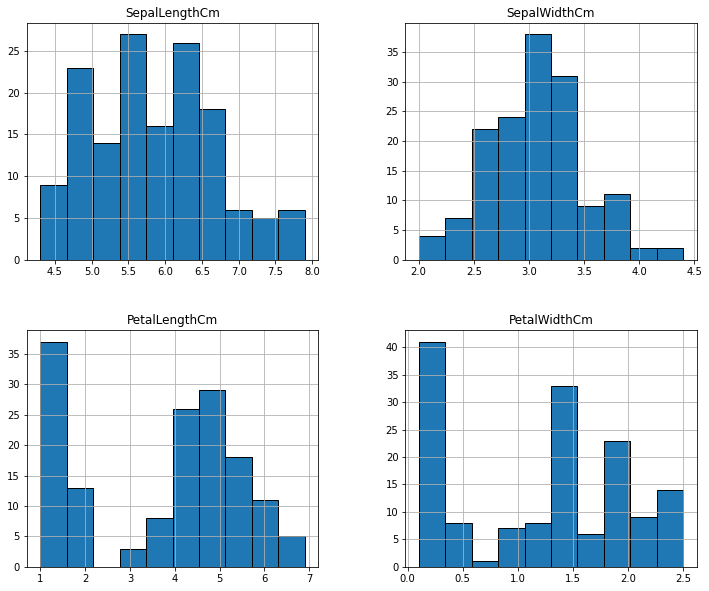

In [8]:
iris.hist(edgecolor='black',figsize=(12,10))
plt.show()

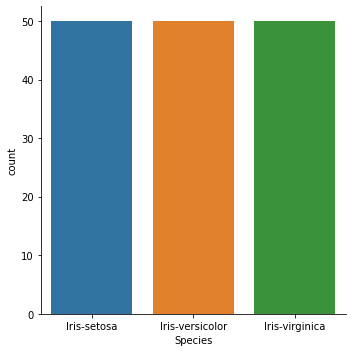

In [9]:
sn.catplot(x="Species", data=iris, kind="count")

In [10]:
for column in iris.columns:
    if iris[column].dtype.name!='object':
        print('{} skew: {}'.format(column, iris[column].skew()))
        print('{} kurtosis: {}\n'.format(column,iris[column].kurtosis()))


SepalLengthCm skew: 0.3149109566369728
SepalLengthCm kurtosis: -0.5520640413156395

SepalWidthCm skew: 0.3340526621720866
SepalWidthCm kurtosis: 0.2907810623654279

PetalLengthCm skew: -0.27446425247378287
PetalLengthCm kurtosis: -1.4019208006454036

PetalWidthCm skew: -0.10499656214412734
PetalWidthCm kurtosis: -1.3397541711393433




highly positively skewwd(>1) 
moderately positively skewed(0.5<> 1)
moderately Negatively skewed(-1 <> -0.5)


kurtosis  <3 that means distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic.That data are light-tailed or lack of outliers. 

 negative kurtosis, it is said to be platykurtic, which means that it has a flatter peak and thinner tails compared to a normal distribution. This simply means that more data values are located near the mean and less data values are located on the tails.

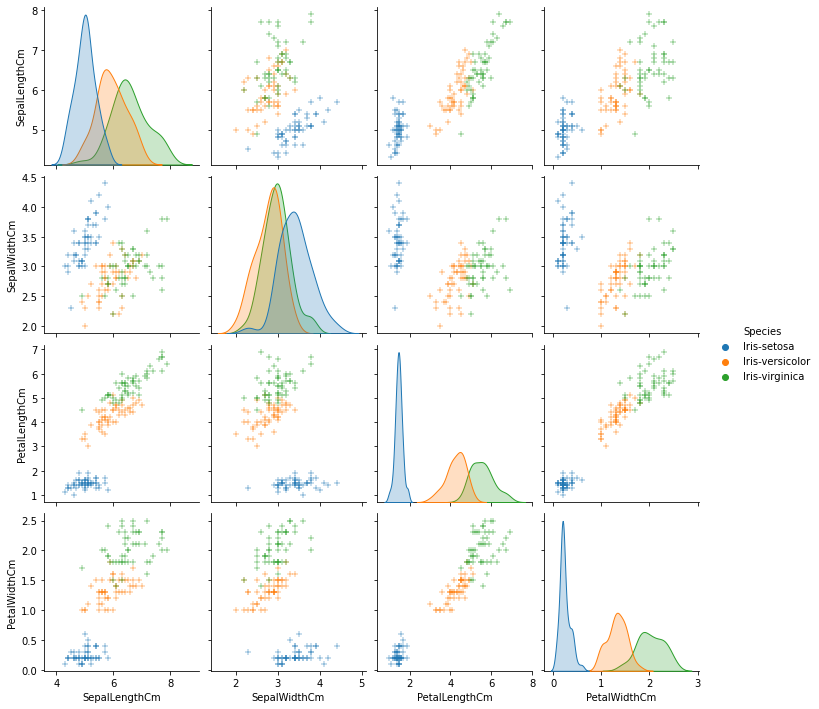

In [11]:
sn.pairplot(iris,hue='Species', markers ='+')

we can analyse that the feature PetalLengthCm and PetalWidthCm has approx linear relationship

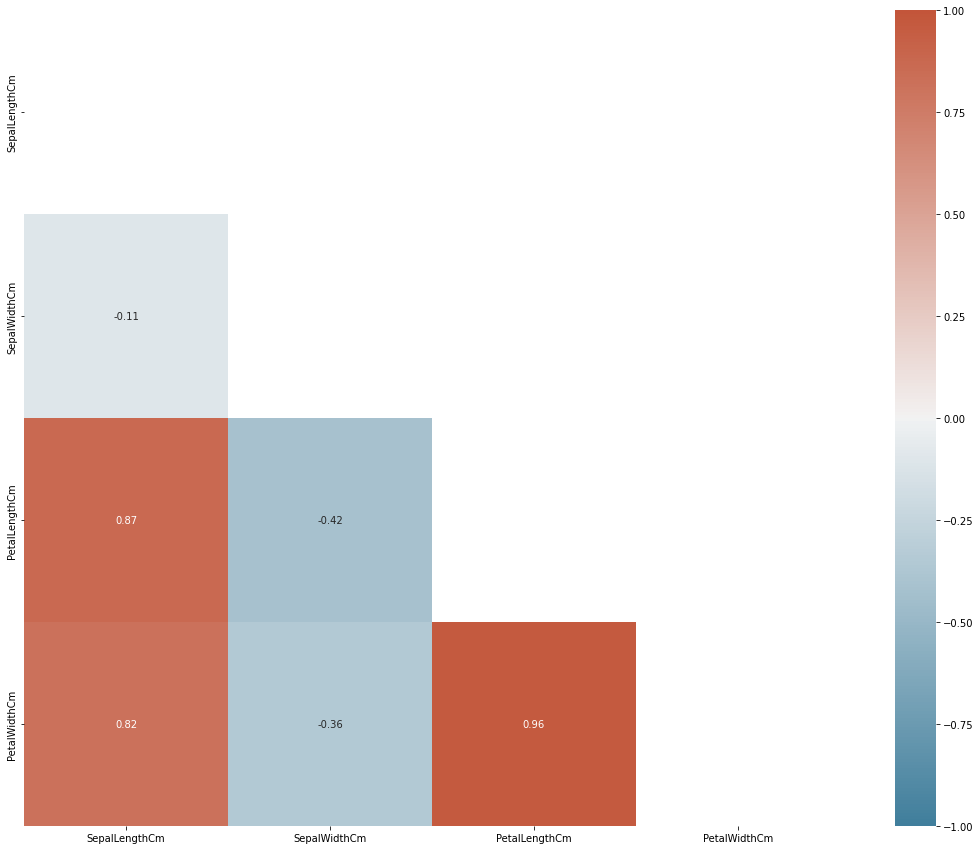

In [12]:
corrMatrix= iris.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20,15)) 

cmap = sn.diverging_palette(230, 20, as_cmap=True)

sn.heatmap(corrMatrix, mask= mask, cmap=cmap,  vmin=-1, vmax=1, center=0,square =True, annot= True, ax=ax)
plt.show()

### 2.Data preprocessing 
Here i convert  the target feature into Numerical feature using LabelEncoder

In [46]:
X=iris.drop(['Species'],axis=1)
y=iris['Species']

encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3.Split Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)

### 4.Made Model

#### 4.1PCA

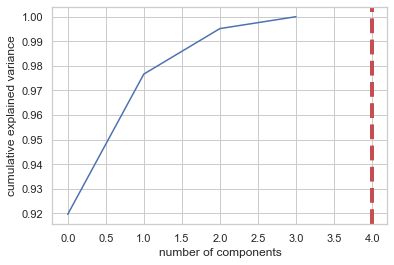

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.919572,0.919572
1,0.976651,0.057079
2,0.995161,0.018510
3,1.000000,0.004839


In [16]:

pca_test=PCA(n_components=4)
pca_test.fit(X_train)

sn.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=4, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(4))

#### 4.2 LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('pca1', PCA(n_components=3)),
    ('lr_classifier',LogisticRegression(random_state=random_state))
])
pipeline_lr.fit(X_train,y_train)


print('logisticregressiona_ccuracy:',np.mean(cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='accuracy')))
logisticregressiona=np.mean(cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring='accuracy'))

logisticregressiona_ccuracy: 0.9583333333333334


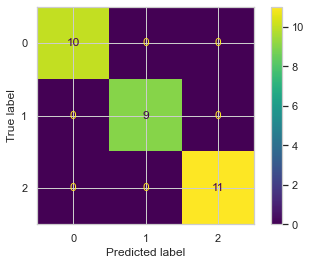

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:

predict=pipeline_lr.predict(X_test)
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test, predict))

#### 4.3 DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

pipeline_decisiontreeClassifier = Pipeline([('pca1', PCA(n_components=3)),
    ('decisionTree_classifier',DecisionTreeClassifier(random_state=random_state))
])
pipeline_decisiontreeClassifier.fit(X_train,y_train)


print('decisionTree_ccuracy:',np.mean(cross_val_score(pipeline_decisiontreeClassifier, X_train, y_train, cv=cv, scoring='accuracy')))
decisionTree=np.mean(cross_val_score(pipeline_decisiontreeClassifier, X_train, y_train, cv=cv, scoring='accuracy'))

decisionTree_ccuracy: 0.9083333333333334


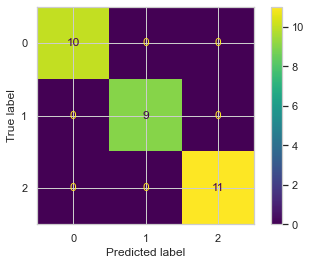

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
predict=pipeline_decisiontreeClassifier.predict(X_test)
cm1 = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()
print(classification_report(y_test, predict))

#### 4.4 KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_KNeighbors = Pipeline([('pca1', PCA(n_components=3)),
    ('KNeighbors',KNeighborsClassifier(n_neighbors=3))
])
pipeline_KNeighbors.fit(X_train,y_train)

print('KNeighbors:',np.mean(cross_val_score(pipeline_KNeighbors, X_train, y_train, cv=cv, scoring='accuracy')))
KNeighbors=np.mean(cross_val_score(pipeline_KNeighbors, X_train, y_train, cv=cv, scoring='accuracy'))

KNeighbors: 0.9666666666666666


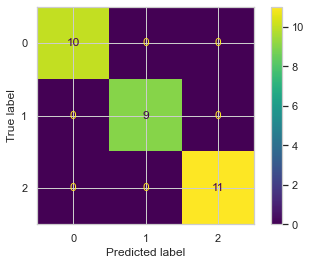

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
predict=pipeline_KNeighbors.predict(X_test)
cm1 = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()
print(classification_report(y_test, predict))

#### 4.5 SVC

In [23]:
 from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.4,0.7,1,1.3,1.5]}
svr = SVC(kernel='rbf',degree=1)


model_cv = GridSearchCV(estimator = svr,
                    
                        param_grid = parameters, 
                        scoring= 'accuracy', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True,refit=True)      

# fit the model
model_cv.fit(X,y ) 

model_cv.best_params_



Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'C': 1.3}

In [24]:
 from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,0.5,1,10]}
svr = SVC()


model_cv = GridSearchCV(estimator = svr,
                    
                        param_grid = parameters, 
                        scoring= 'accuracy', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True,refit=True)      

# fit the model
model_cv.fit(X,y ) 

model_cv.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'C': 0.5, 'kernel': 'linear'}

In [25]:
 from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.2,0.3,0.4,0.5,0.6,0.7]}
svr = SVC(kernel='linear')

model_cv = GridSearchCV(estimator = svr,
                    
                        param_grid = parameters, 
                        scoring= 'accuracy', 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True,refit=True)      

# fit the model
model_cv.fit(X,y ) 

model_cv.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'C': 0.5}

In [26]:
from sklearn.svm import SVC

pipeline_svc = Pipeline([('pca1', PCA(n_components=3)),
    ('svc',SVC(kernel='linear',C=0.5))
])
pipeline_svc.fit(X_train,y_train)

print('SVC:',np.mean(cross_val_score(pipeline_svc, X_train, y_train, cv=cv, scoring='accuracy')))
SVC=np.mean(cross_val_score(pipeline_svc, X_train, y_train, cv=cv, scoring='accuracy'))

SVC: 0.9583333333333334


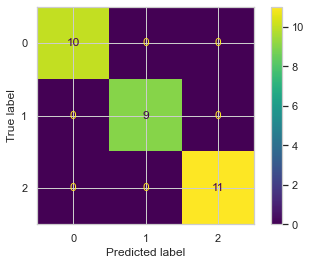

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
predict=pipeline_svc.predict(X_test)
cm2 = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()
print(classification_report(y_test, predict))

### 5.Compare Models

Text(0, 0.5, 'R2')

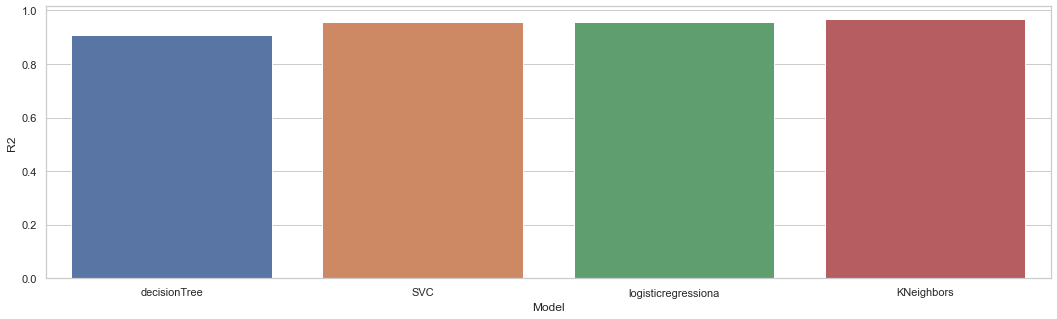

In [28]:
results = pd.DataFrame({"accuracy":[SVC,KNeighbors,decisionTree,logisticregressiona],
                        "Model":['SVC','KNeighbors','decisionTree','logisticregressiona']})
fig, ax = plt.subplots(figsize=(18,5))

sn.barplot(data=results, x="Model", y="accuracy",ax=ax,order=results.sort_values("accuracy").Model)

# Add labels to plot
plt.xlabel("Model")
plt.ylabel("R2")

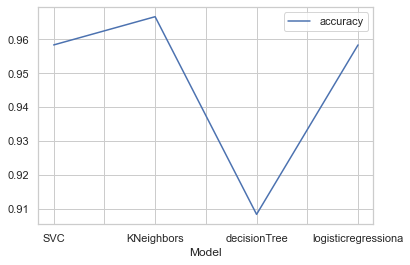

In [29]:
lines= results.plot.line(x="Model", y="accuracy")

### 6.Time Execution

In [30]:
start_time = time.time()
for i in range(1,100):
    predict=pipeline_lr.predict(X_test)
end_time = time.time()


print("Execution time: ", (end_time - start_time)/100,"secs")
Execution_time_Logisticregression= (end_time - start_time)/100


Execution time:  0.001793529987335205 secs


In [31]:
start_time = time.time()
for i in range(1,100):
    predict=pipeline_decisiontreeClassifier.predict(X_test)
end_time = time.time()


print("Execution time: ", (end_time - start_time)/100,"secs")
Execution_time_decisiontreeClassifier= (end_time - start_time)/100


Execution time:  0.0014681601524353027 secs


In [32]:
start_time = time.time()
for i in range(1,100):
    predict=pipeline_KNeighbors.predict(X_test)
end_time = time.time()


print("Execution time: ", (end_time - start_time)/100,"secs")
Execution_time_KNeighbors= (end_time - start_time)/100

Execution time:  0.00381152868270874 secs


In [33]:
start_time = time.time()
for i in range(1,100):
    predict=pipeline_svc.predict(X_test)
end_time = time.time()


print("Execution time: ", (end_time - start_time)/100,"secs")
Execution_time_SCV= (end_time - start_time)/100

Execution time:  0.0019158506393432617 secs


In [34]:
results_time = pd.DataFrame({"Execution time":[Execution_time_SCV,Execution_time_KNeighbors,Execution_time_decisiontreeClassifier,Execution_time_Logisticregression],
                        "Model":['SVC','KNeighbors','decisionTree','logisticregressiona']})

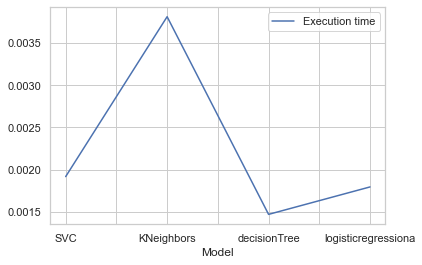

In [35]:
lines1= results_time.plot.line(x="Model", y="Execution time")

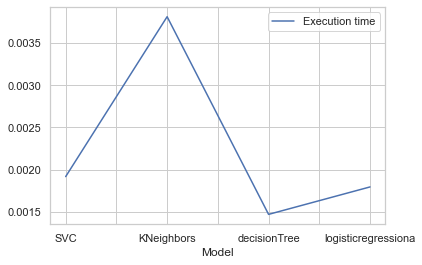

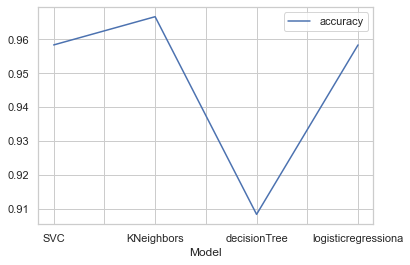

In [36]:
lines1= results_time.plot.line(x="Model", y="Execution time")
lines= results.plot.line(x="Model", y="accuracy")

### 7.Final Model

In [37]:

pipeline_KNeighbors = Pipeline([('pca1', PCA(n_components=3)),
    ('KNeighbors',KNeighborsClassifier(n_neighbors=3))
])
pipeline_KNeighbors.fit(X_train,y_train)
predict=pipeline_KNeighbors.predict(X_test)

print(accuracy_score(y_test,predict))


1.0


In [38]:
# Save model

import joblib
from joblib import dump
joblib.dump(pipeline_KNeighbors,'my_model')

['my_model']

In [39]:
# Load the model from the file

from joblib import load

knn_from_joblib=joblib.load("my_model")
print(knn_from_joblib.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [52]:
print("Enter your Numbers:")
SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm=input().split(',')
X_input= pd.DataFrame([ [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm] ],columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
predict=knn_from_joblib.predict(X_input)
predict_name=encoder.inverse_transform(predict)
print('predict name is:',predict_name)

Enter your Numbers:
6.2,3.4,5.4,2.3
predict name is: ['Iris-virginica']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
